### 一.原理
异常检测的核心是找到那些“不合群”的点，为了对这些点的“不合群”程度进行刻画，我们需要将其转换为量化指标，如上一节的HBOS是通过概率的方式，概率分布越低的点越有可能是异常点，而孤立森林(Isolation Forest，简称IForest)则是借助于距离。iForest的出发点很朴素：我们对布满训练样本的空间，随机选取某一维度，并在该维度上的最小和最大值之间随机选择某一阈值对样本空间进行划分，该过程一直下去，直到每个样本被单独分离出来，如下图。
![avatar](./source/20_iforest.jpg)  

点$A'$与其他点聚集在一起，需要多次划分才能将其分离出来，而$B'$远离那些聚集的点，只需要少数的划分即可分割出来，所以样本被分离出来的切割次数越少则越有可能是异常点。

### 二.孤立树的构建

孤立森林由多颗孤立树集成，通常会随机采样部分样本来构建孤立树，孤立树的构建主要是如下两步：   

（1）从训练数据中随机指定一个维度，并对该维度随机生成一个切割阈值（阈值介于该指定维度的最大值与最小值之间），然后将小于该阈值的数据划分至左节点，大于等于该阈值的数据划分至右节点；  
（2）对左右节点重复（1）步，直到数据达到不可分的状态：1）仅一个样本或样本都一样 2）树达到指定深度（一般取$log_2 n$，$n$为训练样本量）

### 三.异常值的定义

异常值的定义如下：   

$$
Score(x)=2^{-\frac{E(h(x))}{C(\varphi)}}
$$  

这里，$h(x)$表示样本在孤立树中的深度，它的定义如下：   

$$
h(x)=e+C(T.size)
$$  

$e$表示根节点到叶子节点经过的边的数量，$T.size$表示叶子节点的样本量，$C(T.size)$可以理解为修正量，$C(\cdot)$的定义如下：   

$$
C(n)=2H(n-1)-2(n-1)/n\simeq 2ln(n-1)+2*0.5772156649-2(n-1)/n=2ln(n-1)+2/n-0.8455686702
$$  

另外，公式中的$\varphi$表示单棵孤立数的训练样本数，$C(\varphi)$做归一化用。

### 四.代码实现  

根据前面的讨论知道，重要的是这两部分，1）训练：构建孤立树，2）预测：评估异常值；代码就不贴了，放在ml_models.outlier_detect中...

In [1]:
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from ml_models.outlier_detect import IForest

In [2]:
#造数据
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=42)

In [3]:
#训练
iforest = IForest()
iforest.fit(X)
score = iforest.predict(X)

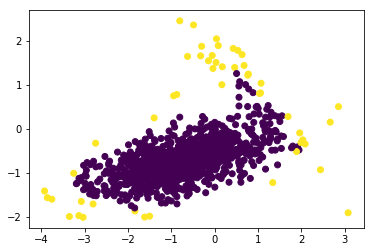

In [4]:
#预测
import numpy as np
thresh=np.percentile(score,95)#前5%设置为异常值
plt.scatter(x=X[:, 0], y=X[:, 1], c=score > thresh)
plt.show()

### 参考
https://zhuanlan.zhihu.com/p/27777266  